<a href="https://colab.research.google.com/github/aribashaikh870-droid/student-performance-prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Build and evaluate a customer churn prediction model using a synthetic dataset, including data generation, preprocessing, model training, performance evaluation (accuracy, precision, recall, F1-score, confusion matrix), and visualization of feature importance. Summarize the model's performance, discuss key insights from feature importance, and suggest potential next steps for improving the churn prediction model.

**Reasoning**:
The first step to generate the synthetic dataset is to import the necessary libraries, define the number of samples, and then generate the numerical and categorical features as specified in the instructions. This includes 'tenure', 'monthly_charges', 'contract_type', 'internet_service', and 'phone_service'.



In [1]:
import pandas as pd
import numpy as np

# Define the number of samples
n_samples = 1000

# Generate numerical features
tenure = np.random.randint(1, 73, n_samples)  # 1 to 72 months
monthly_charges = np.round(np.random.uniform(20, 121, n_samples), 2) # $20 to $120.99

# Generate categorical features
contract_type = np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples, p=[0.5, 0.3, 0.2])
internet_service = np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples, p=[0.35, 0.45, 0.2])
phone_service = np.random.choice(['Yes', 'No'], n_samples, p=[0.9, 0.1])

print("Generated numerical and categorical features.")

Generated numerical and categorical features.


**Reasoning**:
Based on the instructions, the next step is to create a binary `churn` target variable and then combine all generated features into a single pandas DataFrame. The churn variable will be made dependent on `tenure`, `monthly_charges`, and `contract_type` to simulate a realistic scenario.



In [2]:
churn = np.zeros(n_samples, dtype=int)

# Higher churn for month-to-month contracts
churn[contract_type == 'Month-to-month'] = np.random.choice([0, 1],
    size=(contract_type == 'Month-to-month').sum(),
    p=[0.7, 0.3])

# Higher churn for lower tenure customers
churn[tenure < 24] = np.random.choice([0, 1],
    size=(tenure < 24).sum(),
    p=[0.75, 0.25])

# Higher churn for higher monthly charges
churn[monthly_charges > 80] = np.random.choice([0, 1],
    size=(monthly_charges > 80).sum(),
    p=[0.7, 0.3])

# Combine into a DataFrame
df = pd.DataFrame({
    'tenure': tenure,
    'monthly_charges': monthly_charges,
    'contract_type': contract_type,
    'internet_service': internet_service,
    'phone_service': phone_service,
    'churn': churn
})

print("Generated churn target and created DataFrame.")
print(df.head())

Generated churn target and created DataFrame.
   tenure  monthly_charges   contract_type internet_service phone_service  \
0      60            36.72        Two year              DSL           Yes   
1      30           101.78  Month-to-month               No           Yes   
2      22            63.04        One year      Fiber optic           Yes   
3       7            52.78        One year      Fiber optic            No   
4      13            69.96        Two year              DSL           Yes   

   churn  
0      0  
1      1  
2      0  
3      0  
4      0  


**Reasoning**:
The subtask requires preprocessing the dataset by separating features and target, applying one-hot encoding to categorical variables, and splitting the data into training and testing sets. This code block will perform all these steps sequentially.



In [3]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) from target variable (y)
X = df.drop('churn', axis=1)
y = df['churn']

# 2. Identify categorical columns
categorical_cols = ['contract_type', 'internet_service', 'phone_service']

# 3. Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 4. Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")
print(f"Original features shape: {X.shape}")
print(f"Encoded features shape: {X_encoded.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("First 5 rows of encoded features:")
print(X_encoded.head())

Data preprocessing complete.
Original features shape: (1000, 5)
Encoded features shape: (1000, 7)
X_train shape: (800, 7)
X_test shape: (200, 7)
y_train shape: (800,)
y_test shape: (200,)
First 5 rows of encoded features:
   tenure  monthly_charges  contract_type_One year  contract_type_Two year  \
0      60            36.72                   False                    True   
1      30           101.78                   False                   False   
2      22            63.04                    True                   False   
3       7            52.78                    True                   False   
4      13            69.96                   False                    True   

   internet_service_Fiber optic  internet_service_No  phone_service_Yes  
0                         False                False               True  
1                         False                 True               True  
2                          True                False               True  
3            

## Train Machine Learning Model

### Subtask:
Train a suitable classification model (e.g., RandomForestClassifier or Logistic Regression) on the preprocessed training data to predict customer churn.


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("RandomForestClassifier model training complete.")

RandomForestClassifier model training complete.


**Reasoning**:
To evaluate the model's performance, I will import the necessary metrics and visualization tools from `sklearn.metrics`, make predictions on the test set, calculate and print the accuracy, precision, recall, and F1-score, and then generate and display a confusion matrix plot with appropriate labels and a title.



Model Performance on Test Set:
Accuracy: 0.7200
Precision: 0.2333
Recall: 0.1750
F1-Score: 0.2000


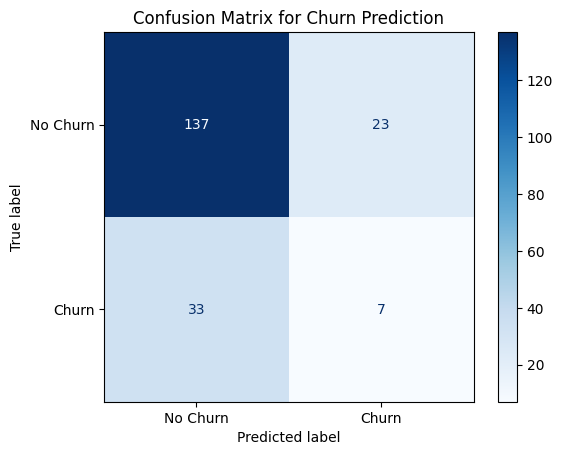

Model evaluation complete and confusion matrix displayed.


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Compute and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Churn Prediction')
plt.show()
print("Model evaluation complete and confusion matrix displayed.")

**Reasoning**:
To visualize feature importance, I need to extract the feature importances from the trained RandomForestClassifier model, map them to their corresponding feature names, sort them, and then create a bar chart for visualization with appropriate labels and title.



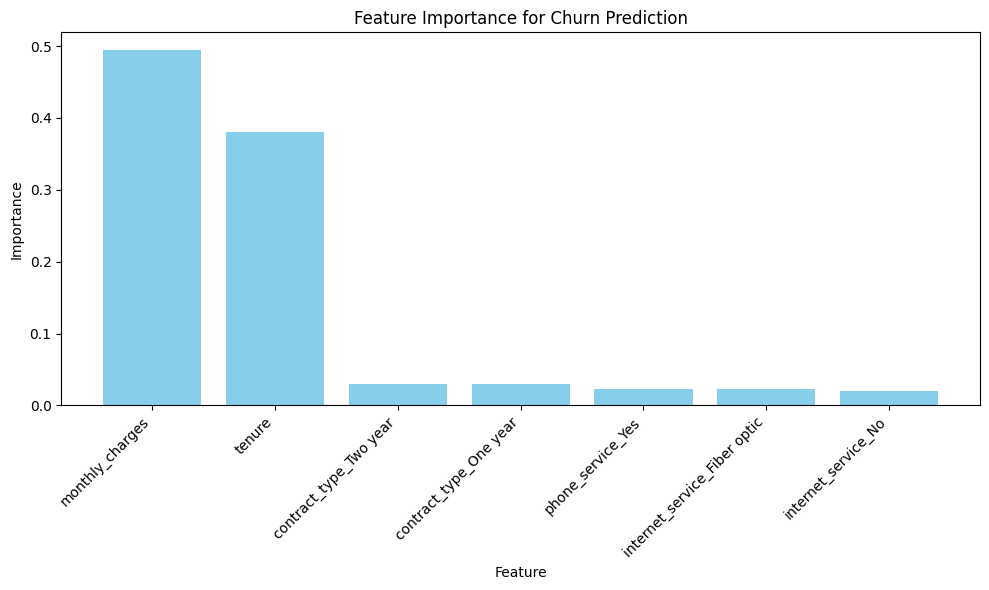

Feature importance visualization complete.


In [6]:
import matplotlib.pyplot as plt

# 1. Access the feature_importances_ attribute
feature_importances = model.feature_importances_

# 2. Create a Pandas Series that maps feature importances to feature names
features_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# 3. Sort the features by their importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# 4. Create a bar chart to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Churn Prediction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Feature importance visualization complete.")

## Final Task

### Subtask:
Summarize the model's performance, discuss key insights from feature importance, and suggest potential next steps for improving the churn prediction model.
